In [99]:
import json
from wordcloud import WordCloud
from wordcloud import WordCloud
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import ast
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
# import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



In [100]:
import pandas as pd

# Load JSON files as dataframes
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)

print("Dataframes loaded successfully!")

Dataframes loaded successfully!


In [101]:
business_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [102]:
business_df.shape

(150346, 14)

In [103]:
business_df.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [104]:
business_df.attributes

0                             {'ByAppointmentOnly': 'True'}
1                    {'BusinessAcceptsCreditCards': 'True'}
2         {'BikeParking': 'True', 'BusinessAcceptsCredit...
3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
4         {'BusinessAcceptsCreditCards': 'True', 'Wheelc...
                                ...                        
150341    {'ByAppointmentOnly': 'False', 'RestaurantsPri...
150342    {'BusinessAcceptsCreditCards': 'True', 'Restau...
150343    {'RestaurantsPriceRange2': '1', 'BusinessAccep...
150344    {'BusinessParking': '{'garage': False, 'street...
150345    {'WheelchairAccessible': 'True', 'BusinessAcce...
Name: attributes, Length: 150346, dtype: object

In [105]:
business_df.attributes.shape

(150346,)

In [106]:
import pandas as pd
import ast

# Assuming your dataframe is called business_df
# First, let's ensure the 'attributes' column is properly parsed

# Convert the string representation of dictionaries into actual dictionaries
business_df['attributes'] = business_df['attributes'].apply(lambda x: ast.literal_eval(str(x)) if pd.notnull(x) else {})

# Now expand the 'attributes' column into separate columns
attributes_df = business_df['attributes'].apply(pd.Series)

# Merge the expanded attributes back into the original dataframe
business_df_expanded = pd.concat([business_df, attributes_df], axis=1)

# Optionally, you can drop the original 'attributes' column if it's no longer needed
# business_df_expanded = business_df_expanded.drop(columns=['attributes'])

# Display the new dataframe with attributes as features
print(business_df_expanded.head())


              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  AcceptsInsurance  \
0  34.426679 -119.711197    5.0             7  ...               NaN   
1  38.551126  -90.335695    3.0            15  ...               NaN   
2  32.223236 -110.880452  

In [107]:
business_df_expanded.shape

(150346, 53)

In [108]:
business_df_expanded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
business_df_expanded.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2',
       'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters',
       'WiFi', 'BusinessParking', 'WheelchairAccessible', 'HappyHour',
       'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed',
       'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience',
       'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru',
       'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking',
       'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB',
       'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours',
       'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')

In [110]:
# Calculate the percentage of missing values for each column
missing_percentage = business_df_expanded.isnull().mean() * 100

# Get the columns with more than 50% missing values
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Drop these columns from the dataframe
business_df_expanded = business_df_expanded.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns with more than 50% missing values dropped: {columns_to_drop}")


Columns with more than 50% missing values dropped: Index(['ByAppointmentOnly', 'BikeParking', 'CoatCheck', 'RestaurantsTakeOut',
       'RestaurantsDelivery', 'Caters', 'WiFi', 'WheelchairAccessible',
       'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations',
       'DogsAllowed', 'Alcohol', 'GoodForKids', 'RestaurantsAttire',
       'Ambience', 'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin',
       'Smoking', 'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights',
       'BYOB', 'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours',
       'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions'],
      dtype='object')


In [111]:
business_df_expanded.shape

(150346, 17)

In [112]:
# Check for missing values in the dataframe
missing_values = business_df_expanded.isnull().sum()

# Handle missing values (this can be customized depending on your data)
# Option 1: Fill missing numerical values with the median or mean
business_df_expanded['stars'].fillna(business_df_expanded['stars'].median(), inplace=True)

# Option 2: Fill missing categorical values with 'Unknown' or mode
for column in business_df_expanded.select_dtypes(include='object').columns:
    business_df_expanded[column].fillna('Unknown', inplace=True)

# Option 3: Drop columns with too many missing values (if needed)
# business_df_expanded = business_df_expanded.drop(columns=['column_with_many_missing_values'])


In [113]:
business_df_expanded.isnull().sum().sum()

0

In [114]:
business_df_expanded.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'BusinessParking'],
      dtype='object')

In [115]:
from sklearn.preprocessing import LabelEncoder

# Columns that need label encoding
binary_columns = ['is_open', 'BusinessAcceptsCreditCards']

label_encoder = LabelEncoder()
for column in binary_columns:
    business_df_expanded[column] = label_encoder.fit_transform(business_df_expanded[column].astype(str))


In [116]:
business_df_expanded.shape

(150346, 17)

In [117]:
business_df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   name                        150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   stars                       150346 non-null  float64
 9   review_count                150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  attributes                  150346 non-null  object 
 12  categories                  150346 non-null  object 
 13  hours         

In [118]:
business_df_expanded['categories']

0         Doctors, Traditional Chinese Medicine, Naturop...
1         Shipping Centers, Local Services, Notaries, Ma...
2         Department Stores, Shopping, Fashion, Home & G...
3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
                                ...                        
150341                           Nail Salons, Beauty & Spas
150342    Pets, Nurseries & Gardening, Pet Stores, Hobby...
150343    Shopping, Jewelry, Piercing, Toy Stores, Beaut...
150344    Fitness/Exercise Equipment, Eyewear & Optician...
150345    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 150346, dtype: object

In [119]:
#One Hot Encoding Top 10 categories

#Splitting the categories into separate items
business_df_expanded['categories_split'] = business_df_expanded['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

#Getting the top 10 most common categories
all_categories = business_df_expanded['categories_split'].explode()  # Flatten the list of categories
top_10_categories = all_categories.value_counts().head(10).index.tolist()

#One-hot encoding the top 10 categories
for category in top_10_categories:
    business_df_expanded[category] = business_df_expanded['categories_split'].apply(lambda x: 1 if category in x else 0)

#Dropping the temporary 'categories_split' column
business_df_expanded = business_df_expanded.drop(columns=['categories_split'])

business_df_expanded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Restaurants,Food,Shopping,Home Services,Beauty & Spas,Nightlife,Health & Medical,Local Services,Bars,Automotive
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,0,0,0,0,0,0,1,0,0,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,0,0,0,0,0,0,0,1,0,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,0,0,1,0,0,0,0,0,0,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,1,0,0,0,0,0,0,0,0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,1,0,0,0,0,0,0,0,0


In [120]:
business_df_expanded.shape

(150346, 27)

In [121]:
# Drop irrelevant columns
business_df_expanded = business_df_expanded.drop(columns=[ 'name', 'address'])
#'name', 'address', 'attributes', 'categories', 'hours'

In [122]:
business_df_expanded = business_df_expanded.drop(columns=[ 'attributes', 'categories', 'hours'])


In [123]:
business_df_expanded.shape

(150346, 22)

In [124]:
business_df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   city                        150346 non-null  object 
 2   state                       150346 non-null  object 
 3   postal_code                 150346 non-null  object 
 4   latitude                    150346 non-null  float64
 5   longitude                   150346 non-null  float64
 6   stars                       150346 non-null  float64
 7   review_count                150346 non-null  int64  
 8   is_open                     150346 non-null  int64  
 9   BusinessAcceptsCreditCards  150346 non-null  int64  
 10  RestaurantsPriceRange2      150346 non-null  object 
 11  BusinessParking             150346 non-null  object 
 12  Restaurants                 150346 non-null  int64  
 13  Food          

In [125]:
business_df_expanded.isnull().sum()

business_id                   0
city                          0
state                         0
postal_code                   0
latitude                      0
longitude                     0
stars                         0
review_count                  0
is_open                       0
BusinessAcceptsCreditCards    0
RestaurantsPriceRange2        0
BusinessParking               0
Restaurants                   0
Food                          0
Shopping                      0
Home Services                 0
Beauty & Spas                 0
Nightlife                     0
Health & Medical              0
Local Services                0
Bars                          0
Automotive                    0
dtype: int64

In [126]:
business_df_expanded['BusinessParking'].head()

0                                              Unknown
1                                              Unknown
2    {'garage': False, 'street': False, 'validated'...
3    {'garage': False, 'street': True, 'validated':...
4    {'garage': None, 'street': None, 'validated': ...
Name: BusinessParking, dtype: object

In [127]:
(business_df_expanded['BusinessParking'] == 'Unknown').sum()

59261

In [128]:
business_df_expanded['BusinessParking'].isna().sum()

0

In [129]:
business_df_expanded = business_df_expanded.dropna(subset=['BusinessParking'])

In [130]:
business_df_expanded.shape

(150346, 22)

In [131]:
(business_df_expanded['BusinessParking'] == 'Unknown').sum()

59261

In [132]:
# Step 1: Remove rows with 'Unknown' in the 'BusinessParking' column
business_df_expanded = business_df_expanded[business_df_expanded['BusinessParking'] != 'Unknown']

In [133]:
business_df_expanded.shape

(91085, 22)

In [134]:
business_df_expanded['BusinessParking'].iloc[0]

"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"

In [135]:
import ast
import pandas as pd

# Function to safely parse each entry in 'BusinessParking'
def safe_literal_eval(item):
    try:
        # Try to parse the item if it's a string
        if isinstance(item, str):
            return ast.literal_eval(item)
        # Return the item if it's already a dictionary
        elif isinstance(item, dict):
            return item
        # Return an empty dictionary for any other type
        return {}
    except (ValueError, SyntaxError):
        return {}

# Apply the parsing function to each element in the 'BusinessParking' column
business_df_expanded['BusinessParking'] = business_df_expanded['BusinessParking'].apply(safe_literal_eval)

# Normalize the 'BusinessParking' dictionary into separate columns
df_business_latest = pd.json_normalize(business_df_expanded['BusinessParking'])

# Combine the new dataframe with the original one (if needed)
business_df_expanded = pd.concat([business_df_expanded, df_business_latest], axis=1)

# Drop the 'BusinessParking' column if no longer needed
business_df_expanded = business_df_expanded.drop(columns=['BusinessParking'])

# Check the updated dataframe
print(business_df_expanded.head())


              business_id          city state postal_code   latitude  \
2  tUFrWirKiKi_TAnsVWINQQ        Tucson    AZ       85711  32.223236   
3  MTSW4McQd7CbVtyjqoe9mw  Philadelphia    PA       19107  39.955505   
4  mWMc6_wTdE0EUBKIGXDVfA    Green Lane    PA       18054  40.338183   
5  CF33F8-E6oudUQ46HnavjQ  Ashland City    TN       37015  36.269593   
6  n_0UpQx1hsNbnPUSlodU8w     Brentwood    MO       63144  38.627695   

    longitude  stars  review_count  is_open  BusinessAcceptsCreditCards  ...  \
2 -110.880452    3.5          22.0      0.0                         2.0  ...   
3  -75.155564    4.0          80.0      1.0                         0.0  ...   
4  -75.471659    4.5          13.0      1.0                         2.0  ...   
5  -87.058943    2.0           6.0      1.0                         2.0  ...   
6  -90.340465    2.5          13.0      1.0                         2.0  ...   

  Nightlife  Health & Medical  Local Services  Bars  Automotive  garage  \
2       0.0

In [136]:
business_df_expanded.shape

(126947, 26)

In [137]:
business_df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126947 entries, 2 to 91084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 91085 non-null  object 
 1   city                        91085 non-null  object 
 2   state                       91085 non-null  object 
 3   postal_code                 91085 non-null  object 
 4   latitude                    91085 non-null  float64
 5   longitude                   91085 non-null  float64
 6   stars                       91085 non-null  float64
 7   review_count                91085 non-null  float64
 8   is_open                     91085 non-null  float64
 9   BusinessAcceptsCreditCards  91085 non-null  float64
 10  RestaurantsPriceRange2      91085 non-null  object 
 11  Restaurants                 91085 non-null  float64
 12  Food                        91085 non-null  float64
 13  Shopping                    91085 n

In [138]:
business_df_expanded = business_df_expanded.dropna(subset=['validated'])

In [139]:
business_df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86654 entries, 4 to 91084
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 52569 non-null  object 
 1   city                        52569 non-null  object 
 2   state                       52569 non-null  object 
 3   postal_code                 52569 non-null  object 
 4   latitude                    52569 non-null  float64
 5   longitude                   52569 non-null  float64
 6   stars                       52569 non-null  float64
 7   review_count                52569 non-null  float64
 8   is_open                     52569 non-null  float64
 9   BusinessAcceptsCreditCards  52569 non-null  float64
 10  RestaurantsPriceRange2      52569 non-null  object 
 11  Restaurants                 52569 non-null  float64
 12  Food                        52569 non-null  float64
 13  Shopping                    52569 no

In [140]:
business_df_expanded2 =business_df_expanded.copy()

In [141]:
business_df_expanded2.reset_index(inplace=True,drop=True)

In [142]:
business_df_expanded2['validated'].value_counts()


validated
False    85815
True       839
Name: count, dtype: int64

### There is a Big Class Imbalance in the Validated column

In [143]:

# # Load JSON files as dataframes
# review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True)

# print("Dataframes loaded successfully!")

In [144]:
## Loading Review data 
review_data = []

# Load the file in chunks
chunksize = 1000  # Adjust chunksize to process in smaller parts
for chunk in pd.read_json('yelp_academic_dataset_review.json',
                          lines=True,
                          chunksize=chunksize):
    review_data.append(chunk)

    # Break once we have 1000k rows
    if len(pd.concat(review_data)) >= 1000000:
        break

# Concatenate the chunks to form the full dataset with 10k rows
review_df = pd.concat(review_data)[:1000000]

print(f"Successfully loaded {len(review_df)} rows from the review dataset")

Successfully loaded 1000000 rows from the review dataset


In [145]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   review_id    1000000 non-null  object        
 1   user_id      1000000 non-null  object        
 2   business_id  1000000 non-null  object        
 3   stars        1000000 non-null  int64         
 4   useful       1000000 non-null  int64         
 5   funny        1000000 non-null  int64         
 6   cool         1000000 non-null  int64         
 7   text         1000000 non-null  object        
 8   date         1000000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 68.7+ MB


In [146]:
merged_df = business_df_expanded2.merge(review_df, on='business_id', how='inner')

In [147]:
merged_df

,business_id,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,BusinessAcceptsCreditCards,...,lot,valet,review_id,user_id,stars_y,useful,funny,cool,text,date
0,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1.0,2.0,...,True,False,aymw6DJh-j3Kkb4DhLSHmQ,lrtGPAmDqCFnbfAKiB4NmA,4,0,0,0,The craft brewery scene has finally hit the sl...,2019-11-02 01:18:50
1,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1.0,2.0,...,True,False,ApjOijn6shg7IRSus0awMg,Qp43wr0CkKw4W79MFu_MGw,5,0,0,0,Glad to have a local brewery so close to my ho...,2019-08-16 13:26:24
2,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1.0,2.0,...,True,False,LsHkuF1GP9H-6arEgwzUWg,DCvqkfO3exqOaTf0-fvyLQ,5,0,0,0,First visit to this new and very local brewery...,2019-11-24 03:49:39
3,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1.0,2.0,...,True,False,4WUbaBVdES19JKWF7Gvh7g,Y7BFSuNRNzvFbyZcZSXQJw,5,0,0,0,What an amazing brewery and an absolute asset ...,2020-02-27 06:21:36
4,mWMc6_wTdE0EUBKIGXDVfA,Green Lane,PA,18054,40.338183,-75.471659,4.5,13.0,1.0,2.0,...,True,False,pcy8VIa3REGXpFPy2KzRkg,rNU2GcAFNSc4XsZQkEbmWw,5,0,0,0,"Great atmosphere, cool people and excellent be...",2019-08-03 02:24:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811077,I13HqIkWfR6CydGbo9xv0A,Madeira Beach,FL,33708,27.803259,-82.803567,4.5,298.0,1.0,2.0,...,True,False,BtyBJi32pqrwU7kORI1zFw,CRnk0F7EUMLxwHlhrb2FLg,5,0,0,0,Some of the best ice cream I have ever had! I ...,2017-12-25 19:20:51
811078,I13HqIkWfR6CydGbo9xv0A,Madeira Beach,FL,33708,27.803259,-82.803567,4.5,298.0,1.0,2.0,...,True,False,tCQ_--f2rRjo14T1xOfetw,rBdy4XFsqDGlcBORVbmKJA,5,5,0,2,Haze is my go to ice cream spot on the beach. ...,2016-09-17 19:12:15
811079,I13HqIkWfR6CydGbo9xv0A,Madeira Beach,FL,33708,27.803259,-82.803567,4.5,298.0,1.0,2.0,...,True,False,lYosd4k9yOSIoU8_5lfwyA,snlI_wva-rGtqiLJcrwKRA,5,0,0,0,An ice cream gem! Try their Oreo red velvet. S...,2019-04-05 00:43:36
811080,I13HqIkWfR6CydGbo9xv0A,Madeira Beach,FL,33708,27.803259,-82.803567,4.5,298.0,1.0,2.0,...,True,False,c_BuAHjcVnOBjCnYVvnX3g,1nIjaow2-lU9IRX9drcHKA,5,1,0,0,This is the place to go if you want hand-craft...,2015-12-15 14:05:53


In [148]:
merged_df.shape

(811082, 34)

In [149]:
merged_df.isnull().sum()

business_id                       0
city                              0
state                             0
postal_code                       0
latitude                          0
longitude                         0
stars_x                           0
review_count                      0
is_open                           0
BusinessAcceptsCreditCards        0
RestaurantsPriceRange2            0
Restaurants                       0
Food                              0
Shopping                          0
Home Services                     0
Beauty & Spas                     0
Nightlife                         0
Health & Medical                  0
Local Services                    0
Bars                              0
Automotive                        0
garage                         8431
street                        21172
validated                         0
lot                           20207
valet                             0
review_id                         0
user_id                     

In [150]:
merged_df['validated'].value_counts().min()

7581

In [151]:
merged_df['validated'].value_counts().max()

803501

In [152]:
merged_df['validated'].value_counts()

validated
False    803501
True       7581
Name: count, dtype: int64

In [153]:
# Downsampling 
minority_size = merged_df['validated'].value_counts().min()

downsample_df = merged_df.groupby('validated').apply(lambda x: x.sample(minority_size)).reset_index(drop=True)

In [154]:
downsample_df['validated'].value_counts()

validated
False    7581
True     7581
Name: count, dtype: int64

In [155]:
downsample_df.shape

(15162, 34)

In [156]:
new_df = downsample_df

In [157]:
new_df.isnull().sum()

business_id                     0
city                            0
state                           0
postal_code                     0
latitude                        0
longitude                       0
stars_x                         0
review_count                    0
is_open                         0
BusinessAcceptsCreditCards      0
RestaurantsPriceRange2          0
Restaurants                     0
Food                            0
Shopping                        0
Home Services                   0
Beauty & Spas                   0
Nightlife                       0
Health & Medical                0
Local Services                  0
Bars                            0
Automotive                      0
garage                         90
street                        197
validated                       0
lot                           176
valet                           0
review_id                       0
user_id                         0
stars_y                         0
useful        

In [158]:
new_df.reset_index(inplace=True,drop=True)

In [159]:
## Outlier Handling 
for column in ['useful', 'funny', 'cool']:
    threshold = new_df[column].quantile(0.95)
    new_df = new_df[new_df[column] <= threshold]

In [196]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13241 entries, 0 to 15161
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   business_id                 13241 non-null  object        
 1   city                        13241 non-null  object        
 2   state                       13241 non-null  object        
 3   postal_code                 13241 non-null  object        
 4   latitude                    13241 non-null  float64       
 5   longitude                   13241 non-null  float64       
 6   stars_x                     13241 non-null  float64       
 7   review_count                13241 non-null  float64       
 8   is_open                     13241 non-null  float64       
 9   BusinessAcceptsCreditCards  13241 non-null  float64       
 10  RestaurantsPriceRange2      13241 non-null  object        
 11  Restaurants                 13241 non-null  float64       


## Separate X and y 

In [194]:
X = merged_df.drop('validated', axis=1)
y = merged_df['validated']

In [199]:
y.value_counts()

validated
False    803501
True       7581
Name: count, dtype: int64

Fill Missing Values or Convert to a Common Format

In [201]:
# Define columns that are boolean-like
boolean_columns = ['is_open', 'BusinessAcceptsCreditCards', 'Restaurants', 'Food', 'Shopping', 
                   'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 
                   'Local Services', 'Bars', 'Automotive', 'garage', 'street', 'lot', 'valet', 
                   'useful', 'funny', 'cool']

# Convert boolean-like columns to 0/1, ensuring all None/NaN are handled
for col in boolean_columns:
    # Fill NaN or None with a default value, e.g., False (which will be converted to 0)
    X[col] = X[col].fillna(False).astype(int)


 Used LabelEncoder for Non-Boolean Categorical Columns

In [202]:
from sklearn.preprocessing import LabelEncoder

# Example for other categorical columns
categorical_columns = ['state', 'RestaurantsPriceRange2']  # Add other non-boolean categorical columns as needed

label_encoder = LabelEncoder()

for col in categorical_columns:
    # Fill NaNs with a placeholder string
    X[col] = X[col].fillna('Unknown')
    X[col] = label_encoder.fit_transform(X[col])


In [203]:
# Checking the data types and missing values
print(X.dtypes)
print(X.isnull().sum())  

business_id                           object
city                                  object
state                                  int64
postal_code                           object
latitude                             float64
longitude                            float64
stars_x                              float64
review_count                         float64
is_open                                int64
BusinessAcceptsCreditCards             int64
RestaurantsPriceRange2                 int64
Restaurants                            int64
Food                                   int64
Shopping                               int64
Home Services                          int64
Beauty & Spas                          int64
Nightlife                              int64
Health & Medical                       int64
Local Services                         int64
Bars                                   int64
Automotive                             int64
garage                                 int64
street    

### Cleaning Features which is not needed 

In [204]:
X.drop(['business_id','latitude','longitude','postal_code','city','review_id','user_id','text','date'], axis=1, inplace=True)
X['business_stars'] = X['stars_x']
X['review_stars'] = X['stars_y']
X.drop(['stars_x','stars_y'], axis=1, inplace=True)

In [205]:
X

,state,review_count,is_open,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Restaurants,Food,Shopping,Home Services,Beauty & Spas,...,Automotive,garage,street,lot,valet,useful,funny,cool,business_stars,review_stars
0,14,13.0,1,2,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,4
1,14,13.0,1,2,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,5
2,14,13.0,1,2,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,5
3,14,13.0,1,2,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,5
4,14,13.0,1,2,5,0,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811077,5,298.0,1,2,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,5
811078,5,298.0,1,2,1,1,1,0,0,0,...,0,0,0,1,0,5,0,2,4.5,5
811079,5,298.0,1,2,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,4.5,5
811080,5,298.0,1,2,1,1,1,0,0,0,...,0,0,0,1,0,1,0,0,4.5,5


In [206]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (648865, 24), y_train shape: (648865,)
X_test shape: (162217, 24), y_test shape: (162217,)


In [208]:
# Check the unique values and data type of y_train
print(y_train.unique())
print(y_train.dtype)


[False True]
object


In [210]:
# Ensure the target is binary (convert True/False or other to 0/1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Verify the change
print(y_train.unique())


[0 1]


In [217]:
y_train.value_counts()

validated
0    642800
1      6065
Name: count, dtype: int64

In [211]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_train_resampled))


Class distribution after SMOTE: Counter({0: 642800, 1: 642800})


In [222]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [226]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=200, random_state=42, learning_rate=1.0, max_depth=6)

# Train the model on the resampled training set
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on training and test sets
y_pred_train = xgb_model.predict(X_train_resampled)
y_pred_test = xgb_model.predict(X_test)

# Calculate accuracy for both train and test sets
train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Classification report for test set
print("\nClassification Report for Test Set:\n", classification_report(y_test, y_pred_test))



Training Accuracy: 0.9999922215308027
Test Accuracy: 0.9999506833439159

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160701
           1       1.00      1.00      1.00      1516

    accuracy                           1.00    162217
   macro avg       1.00      1.00      1.00    162217
weighted avg       1.00      1.00      1.00    162217



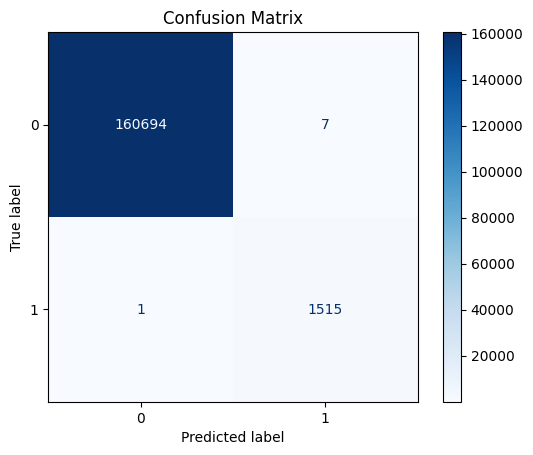

In [227]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

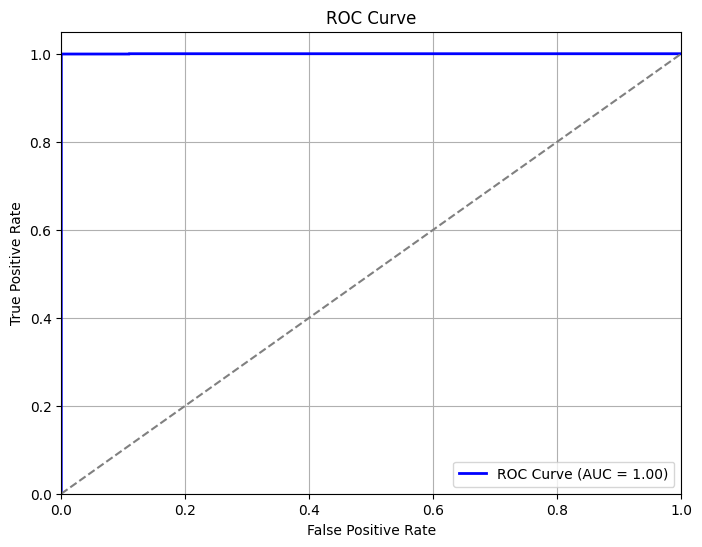

In [228]:
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probability for class 1
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

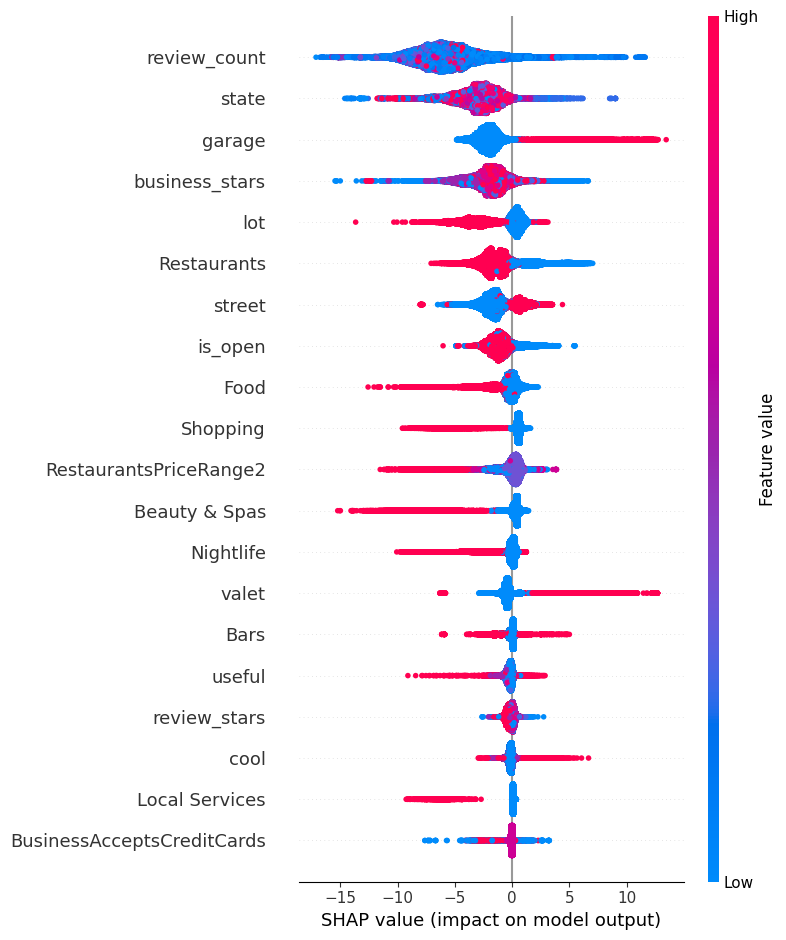

In [231]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)


## Train Test Split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [167]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(648865, 24)
(162217, 24)
(648865,)
(162217,)


In [168]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648865 entries, 777898 to 327010
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       648865 non-null  object 
 1   review_count                648865 non-null  float64
 2   is_open                     648865 non-null  float64
 3   BusinessAcceptsCreditCards  648865 non-null  float64
 4   RestaurantsPriceRange2      648865 non-null  object 
 5   Restaurants                 648865 non-null  float64
 6   Food                        648865 non-null  float64
 7   Shopping                    648865 non-null  float64
 8   Home Services               648865 non-null  float64
 9   Beauty & Spas               648865 non-null  float64
 10  Nightlife                   648865 non-null  float64
 11  Health & Medical            648865 non-null  float64
 12  Local Services              648865 non-null  float64
 13  Bars          

In [172]:
from sklearn.preprocessing import LabelEncoder

# Example for 'state' column using LabelEncoder
label_encoder = LabelEncoder()
X['state'] = label_encoder.fit_transform(X['state'])


In [169]:
||||

SyntaxError: invalid syntax (4081624124.py, line 1)

In [71]:
# y_train.value_counts()

validated
False    642800
True       6065
Name: count, dtype: int64

In [72]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [73]:
df = pd.concat([X_train, y_train.rename('validated')], axis=1)

# Separate the majority and minority classes
df_majority = df[df['validated'] == 1]
df_minority = df[df['validated'] == 0]

##This combines the feature matrix X_train and the target variable y_train into a single DataFrame df. The target variable y_train is renamed to validated for clarity.

In [74]:
print(df_majority.shape, df_minority.shape)

(6065, 25) (642800, 25)


In [75]:
# Check if downsampling is needed
if len(df_majority) > len(df_minority):
    # Downsample the majority class
    df_majority_downsampled = df_majority.sample(len(df_minority), random_state=42)
else:
    # If majority class is not larger, keep it as it is (no downsampling needed)
    df_majority_downsampled = df_majority

# Combine the downsampled (or unchanged) majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the resulting dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate X_train and y_train after downsampling
X_train = df_downsampled.drop('validated', axis=1)
y_train = df_downsampled['validated']


In [76]:
y_train.value_counts()

validated
0    642800
1      6065
Name: count, dtype: int64

In [77]:
y_test.value_counts()

validated
0    160701
1      1516
Name: count, dtype: int64

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(648865, 24)
(648865,)
(162217, 24)
(162217,)


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648865 entries, 0 to 648864
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       648865 non-null  object 
 1   review_count                648865 non-null  float64
 2   is_open                     648865 non-null  float64
 3   BusinessAcceptsCreditCards  648865 non-null  float64
 4   RestaurantsPriceRange2      648865 non-null  object 
 5   Restaurants                 648865 non-null  float64
 6   Food                        648865 non-null  float64
 7   Shopping                    648865 non-null  float64
 8   Home Services               648865 non-null  float64
 9   Beauty & Spas               648865 non-null  float64
 10  Nightlife                   648865 non-null  float64
 11  Health & Medical            648865 non-null  float64
 12  Local Services              648865 non-null  float64
 13  Bars          

some columns that should be int64 or object are in float64 format. This happens when there are missing values (or non-integer values) in the dataset, as Pandas automatically assigns a float64 type to columns with NaNs.

In [80]:
X_train

,state,review_count,is_open,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Restaurants,Food,Shopping,Home Services,Beauty & Spas,...,Automotive,garage,street,lot,valet,useful,funny,cool,business_stars,review_stars
0,IN,18.0,0.0,2.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,1,0,0,2.5,4
1,FL,47.0,1.0,2.0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,False,True,False,False,0,0,0,3.5,1
2,FL,87.0,1.0,2.0,1,1.0,1.0,0.0,0.0,0.0,...,0.0,False,False,True,False,2,1,3,3.5,4
3,FL,103.0,0.0,2.0,2,1.0,1.0,0.0,0.0,0.0,...,0.0,False,True,True,False,0,0,0,3.5,5
4,PA,40.0,1.0,3.0,Unknown,0.0,0.0,0.0,0.0,0.0,...,0.0,False,False,False,False,3,3,0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648860,PA,2761.0,1.0,2.0,3,1.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,0,0,0,4.0,3
648861,PA,206.0,0.0,2.0,1,1.0,0.0,0.0,0.0,0.0,...,0.0,False,False,True,False,0,0,0,4.5,5
648862,LA,337.0,1.0,2.0,2,1.0,0.0,0.0,0.0,0.0,...,0.0,False,True,False,False,0,0,0,4.0,2
648863,PA,261.0,0.0,2.0,2,1.0,1.0,0.0,0.0,0.0,...,0.0,False,False,True,False,2,1,2,4.0,4


In [81]:
# Fill missing values for columns that should be integers
columns_to_fill = ['review_count', 'is_open', 'Restaurants', 'Food', 'Shopping', 'Home Services', 'Beauty & Spas',
                   'Nightlife', 'Health & Medical', 'Local Services', 'Bars', 'Automotive']

for column in columns_to_fill:
    X_train[column].fillna(0, inplace=True)  # Filling missing values with 0

# Convert the relevant columns from float64 to int64
for column in columns_to_fill:
    X_train[column] = X_train[column].astype(int)  # Converting to int

# Fill missing values for object columns with 'Unknown'
object_columns_to_fill = ['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'garage', 'street', 'lot', 'valet']

for column in object_columns_to_fill:
    X_train[column].fillna('Unknown', inplace=True)  # Filling with 'Unknown' for missing string values

# Check the updated data types
print(X_train.dtypes)


state                          object
review_count                    int64
is_open                         int64
BusinessAcceptsCreditCards    float64
RestaurantsPriceRange2         object
Restaurants                     int64
Food                            int64
Shopping                        int64
Home Services                   int64
Beauty & Spas                   int64
Nightlife                       int64
Health & Medical                int64
Local Services                  int64
Bars                            int64
Automotive                      int64
garage                         object
street                         object
lot                            object
valet                          object
useful                          int64
funny                           int64
cool                            int64
business_stars                float64
review_stars                    int64
dtype: object


In [82]:
X_train

,state,review_count,is_open,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Restaurants,Food,Shopping,Home Services,Beauty & Spas,...,Automotive,garage,street,lot,valet,useful,funny,cool,business_stars,review_stars
0,IN,18,0,2.0,2,1,0,0,0,0,...,0,False,False,True,False,1,0,0,2.5,4
1,FL,47,1,2.0,1,1,0,0,0,0,...,0,False,True,False,False,0,0,0,3.5,1
2,FL,87,1,2.0,1,1,1,0,0,0,...,0,False,False,True,False,2,1,3,3.5,4
3,FL,103,0,2.0,2,1,1,0,0,0,...,0,False,True,True,False,0,0,0,3.5,5
4,PA,40,1,3.0,Unknown,0,0,0,0,0,...,0,False,False,False,False,3,3,0,4.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648860,PA,2761,1,2.0,3,1,0,0,0,0,...,0,False,False,True,False,0,0,0,4.0,3
648861,PA,206,0,2.0,1,1,0,0,0,0,...,0,False,False,True,False,0,0,0,4.5,5
648862,LA,337,1,2.0,2,1,0,0,0,0,...,0,False,True,False,False,0,0,0,4.0,2
648863,PA,261,0,2.0,2,1,1,0,0,0,...,0,False,False,True,False,2,1,2,4.0,4


In [83]:


# Replace 'True', 'False', 'None' values in 'BusinessAcceptsCreditCards' with 1, 0, and NaN respectively
X_train['BusinessAcceptsCreditCards'] = X_train['BusinessAcceptsCreditCards'].replace({
    'True': 1, 'False': 0, 'None': np.nan
})
X_test['BusinessAcceptsCreditCards'] = X_test['BusinessAcceptsCreditCards'].replace({
    'True': 1, 'False': 0, 'None': np.nan
})

# Fill NaN values with mode for 'BusinessAcceptsCreditCards'
mode_value_train = X_train['BusinessAcceptsCreditCards'].mode()[0]
X_train['BusinessAcceptsCreditCards'].fillna(mode_value_train, inplace=True)

mode_value_test = X_test['BusinessAcceptsCreditCards'].mode()[0]
X_test['BusinessAcceptsCreditCards'].fillna(mode_value_test, inplace=True)

# Replace 'None' with NaN in 'RestaurantsPriceRange2'
X_train['RestaurantsPriceRange2'] = X_train['RestaurantsPriceRange2'].replace('None', np.nan)
X_test['RestaurantsPriceRange2'] = X_test['RestaurantsPriceRange2'].replace('None', np.nan)

# Fill NaN values with mode for 'RestaurantsPriceRange2'
mode_value_train = X_train['RestaurantsPriceRange2'].mode()[0]
X_train['RestaurantsPriceRange2'].fillna(mode_value_train, inplace=True)

mode_value_test = X_test['RestaurantsPriceRange2'].mode()[0]
X_test['RestaurantsPriceRange2'].fillna(mode_value_test, inplace=True)

# Fill missing values in 'garage' with mode
mode_value_train = X_train['garage'].mode()[0]
X_train['garage'].fillna(mode_value_train, inplace=True)

mode_value_test = X_test['garage'].mode()[0]
X_test['garage'].fillna(mode_value_test, inplace=True)

# Fill missing values in 'street' with mode
mode_value_train = X_train['street'].mode()[0]
X_train['street'].fillna(mode_value_train, inplace=True)

mode_value_test = X_test['street'].mode()[0]
X_test['street'].fillna(mode_value_test, inplace=True)

# Fill missing values in 'lot' with mode
mode_value_train = X_train['lot'].mode()[0]
X_train['lot'].fillna(mode_value_train, inplace=True)

mode_value_test = X_test['lot'].mode()[0]
X_test['lot'].fillna(mode_value_test, inplace=True)

# Check for remaining missing values
missing_values_train = X_train.isnull().sum()
missing_values_test = X_test.isnull().sum()



In [84]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648865 entries, 0 to 648864
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   state                       648865 non-null  object 
 1   review_count                648865 non-null  int64  
 2   is_open                     648865 non-null  int64  
 3   BusinessAcceptsCreditCards  648865 non-null  float64
 4   RestaurantsPriceRange2      648865 non-null  object 
 5   Restaurants                 648865 non-null  int64  
 6   Food                        648865 non-null  int64  
 7   Shopping                    648865 non-null  int64  
 8   Home Services               648865 non-null  int64  
 9   Beauty & Spas               648865 non-null  int64  
 10  Nightlife                   648865 non-null  int64  
 11  Health & Medical            648865 non-null  int64  
 12  Local Services              648865 non-null  int64  
 13  Bars          

In [85]:
X_train.head()

,state,review_count,is_open,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Restaurants,Food,Shopping,Home Services,Beauty & Spas,...,Automotive,garage,street,lot,valet,useful,funny,cool,business_stars,review_stars
0,IN,18,0,2.0,2,1,0,0,0,0,...,0,False,False,True,False,1,0,0,2.5,4
1,FL,47,1,2.0,1,1,0,0,0,0,...,0,False,True,False,False,0,0,0,3.5,1
2,FL,87,1,2.0,1,1,1,0,0,0,...,0,False,False,True,False,2,1,3,3.5,4
3,FL,103,0,2.0,2,1,1,0,0,0,...,0,False,True,True,False,0,0,0,3.5,5
4,PA,40,1,3.0,Unknown,0,0,0,0,0,...,0,False,False,False,False,3,3,0,4.0,4


In [86]:
numerical_data = X_train.select_dtypes(include=['integer','float']).columns

In [87]:
numerical_data

Index(['review_count', 'is_open', 'BusinessAcceptsCreditCards', 'Restaurants',
       'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
       'Health & Medical', 'Local Services', 'Bars', 'Automotive', 'useful',
       'funny', 'cool', 'business_stars', 'review_stars'],
      dtype='object')

In [88]:
# Correct the column selection by using double square brackets
X_train[['review_stars', 'business_stars', 'Automotive', 'is_open', 'BusinessAcceptsCreditCards', 'Restaurants', 'Food',
         'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 'Local Services', 'Bars',
         'useful', 'funny', 'cool','valet']] = X_train[['review_stars', 'business_stars', 'Automotive', 'is_open', 
         'BusinessAcceptsCreditCards', 'Restaurants', 'Food', 'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife',
         'Health & Medical', 'Local Services', 'Bars', 'useful', 'funny', 'cool','valet']].astype(bool)

# Display the info of the dataframe
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648865 entries, 0 to 648864
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   state                       648865 non-null  object
 1   review_count                648865 non-null  int64 
 2   is_open                     648865 non-null  bool  
 3   BusinessAcceptsCreditCards  648865 non-null  bool  
 4   RestaurantsPriceRange2      648865 non-null  object
 5   Restaurants                 648865 non-null  bool  
 6   Food                        648865 non-null  bool  
 7   Shopping                    648865 non-null  bool  
 8   Home Services               648865 non-null  bool  
 9   Beauty & Spas               648865 non-null  bool  
 10  Nightlife                   648865 non-null  bool  
 11  Health & Medical            648865 non-null  bool  
 12  Local Services              648865 non-null  bool  
 13  Bars                        6

In [89]:
y_train.value_counts()

validated
0    642800
1      6065
Name: count, dtype: int64

In [90]:
y_test.value_counts()

validated
0    160701
1      1516
Name: count, dtype: int64

In [91]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(648865, 24)
(648865,)
(162217, 24)
(162217,)


In [92]:
columns_to_object = ['state','review_stars', 'business_stars']

# Define columns to convert to boolean
columns_to_boolean = ['BusinessAcceptsCreditCards', 'Automotive', 'is_open', 'Restaurants', 'Food',
                      'Shopping', 'Home Services', 'Beauty & Spas', 'Nightlife', 'Health & Medical', 
                      'Local Services', 'Bars', 'useful', 'funny', 'cool', 'valet']

# Convert specified columns to object
X_train[columns_to_object] = X_train[columns_to_object].astype(object)

# Convert specified columns to boolean
X_train[columns_to_boolean] = X_train[columns_to_boolean].astype(bool)

# Display the info of the dataframe
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648865 entries, 0 to 648864
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   state                       648865 non-null  object
 1   review_count                648865 non-null  int64 
 2   is_open                     648865 non-null  bool  
 3   BusinessAcceptsCreditCards  648865 non-null  bool  
 4   RestaurantsPriceRange2      648865 non-null  object
 5   Restaurants                 648865 non-null  bool  
 6   Food                        648865 non-null  bool  
 7   Shopping                    648865 non-null  bool  
 8   Home Services               648865 non-null  bool  
 9   Beauty & Spas               648865 non-null  bool  
 10  Nightlife                   648865 non-null  bool  
 11  Health & Medical            648865 non-null  bool  
 12  Local Services              648865 non-null  bool  
 13  Bars                        6

In [93]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(648865, 24)
(648865,)
(162217, 24)
(162217,)


In [94]:
X_train
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

,state,review_count,is_open,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Restaurants,Food,Shopping,Home Services,Beauty & Spas,...,Automotive,garage,street,lot,valet,useful,funny,cool,business_stars,review_stars
0,IN,18,False,True,2,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,True
1,FL,47,True,True,1,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,FL,87,True,True,1,True,True,False,False,False,...,False,False,False,True,False,True,True,True,True,True
3,FL,103,False,True,2,True,True,False,False,False,...,False,False,True,True,False,False,False,False,True,True
4,PA,40,True,True,Unknown,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648860,PA,2761,True,True,3,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
648861,PA,206,False,True,1,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
648862,LA,337,True,True,2,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,True
648863,PA,261,False,True,2,True,True,False,False,False,...,False,False,False,True,False,True,True,True,True,True
